In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Cargamos los datos de entrenamiento
train_df = pd.read_csv("../data/original/Dataset_Salesforce_Predictive_Modelling_TRAIN.txt")

/home/jairsan/Documents/dev/AlwaysLearningDeeper/Salesforce-Predictive-Modelling/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Veamos un ejemplo de los datos con los que contamos.

In [3]:
train_df.head()

,ID_Customer,Imp_Cons_01,Imp_Cons_02,Imp_Cons_03,Imp_Cons_04,Imp_Cons_05,Imp_Cons_06,Imp_Cons_07,Imp_Cons_08,Imp_Cons_09,...,Num_Oper_17,Num_Oper_18,Num_Oper_19,Num_Oper_20,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05,Poder_Adquisitivo
0,TR000001,0.0,0.00,0.000000,63.067778,0.0,52.196667,0.0,0.000000,0.00,...,2,0,0,0,09991,1,70.44,3,20,19709.915000
1,TR000002,0.0,100.58,595.454545,10.899000,0.0,39.473636,0.0,62.268571,42.61,...,4,1,0,0,09991,2,71.87,3,29,37497.492167
2,TR000003,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,...,2,0,0,0,0X301,2,72.48,2,41,4802.970000
3,TR000004,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,...,0,0,0,0,0X301,2,86.60,3,38,8295.770000
4,TR000005,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,...,0,0,0,0,09991,2,92.48,4,35,24149.321667


In [4]:
train_df.columns

Index(['ID_Customer', 'Imp_Cons_01', 'Imp_Cons_02', 'Imp_Cons_03',
       'Imp_Cons_04', 'Imp_Cons_05', 'Imp_Cons_06', 'Imp_Cons_07',
       'Imp_Cons_08', 'Imp_Cons_09', 'Imp_Cons_10', 'Imp_Cons_11',
       'Imp_Cons_12', 'Imp_Cons_13', 'Imp_Cons_14', 'Imp_Cons_15',
       'Imp_Cons_16', 'Imp_Cons_17', 'Imp_Sal_01', 'Imp_Sal_02', 'Imp_Sal_03',
       'Imp_Sal_04', 'Imp_Sal_05', 'Imp_Sal_06', 'Imp_Sal_07', 'Imp_Sal_08',
       'Imp_Sal_09', 'Imp_Sal_10', 'Imp_Sal_11', 'Imp_Sal_12', 'Imp_Sal_13',
       'Imp_Sal_14', 'Imp_Sal_15', 'Imp_Sal_16', 'Imp_Sal_17', 'Imp_Sal_18',
       'Imp_Sal_19', 'Imp_Sal_20', 'Imp_Sal_21', 'Ind_Prod_01', 'Ind_Prod_02',
       'Ind_Prod_03', 'Ind_Prod_04', 'Ind_Prod_05', 'Ind_Prod_06',
       'Ind_Prod_07', 'Ind_Prod_08', 'Ind_Prod_09', 'Ind_Prod_10',
       'Ind_Prod_11', 'Ind_Prod_12', 'Ind_Prod_13', 'Ind_Prod_14',
       'Ind_Prod_15', 'Ind_Prod_16', 'Ind_Prod_17', 'Ind_Prod_18',
       'Ind_Prod_19', 'Ind_Prod_20', 'Ind_Prod_21', 'Ind_Prod_22',
       '

In [5]:
train_df.dtypes

ID_Customer           object
Imp_Cons_01          float64
Imp_Cons_02          float64
Imp_Cons_03          float64
Imp_Cons_04          float64
Imp_Cons_05          float64
Imp_Cons_06          float64
Imp_Cons_07          float64
Imp_Cons_08          float64
Imp_Cons_09          float64
Imp_Cons_10          float64
Imp_Cons_11          float64
Imp_Cons_12          float64
Imp_Cons_13          float64
Imp_Cons_14          float64
Imp_Cons_15          float64
Imp_Cons_16          float64
Imp_Cons_17          float64
Imp_Sal_01           float64
Imp_Sal_02           float64
Imp_Sal_03           float64
Imp_Sal_04           float64
Imp_Sal_05           float64
Imp_Sal_06           float64
Imp_Sal_07           float64
Imp_Sal_08           float64
Imp_Sal_09           float64
Imp_Sal_10           float64
Imp_Sal_11           float64
Imp_Sal_12           float64
                      ...   
Ind_Prod_21            int64
Ind_Prod_22            int64
Ind_Prod_23            int64
Ind_Prod_24   

### Análisis de la variable dependiente.
Miremos con más detenimiento la variable a predecir.

In [6]:
train_df["Poder_Adquisitivo"].describe()

count    3.638340e+05
mean     1.642141e+04
std      2.436773e+04
min      3.600960e+03
25%      9.300933e+03
50%      1.292517e+04
75%      1.894854e+04
max      5.040000e+06
Name: Poder_Adquisitivo, dtype: float64

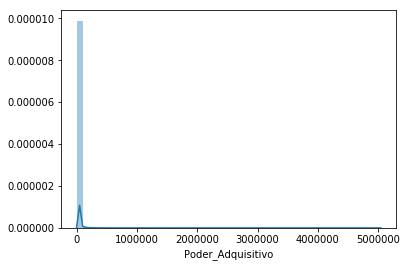

In [7]:
sns.distplot(train_df["Poder_Adquisitivo"])

In [8]:
print("Skewness: %f" % train_df["Poder_Adquisitivo"].skew())
print("Kurtosis: %f" % train_df["Poder_Adquisitivo"].kurt())

Skewness: 55.919866
Kurtosis: 7106.469270


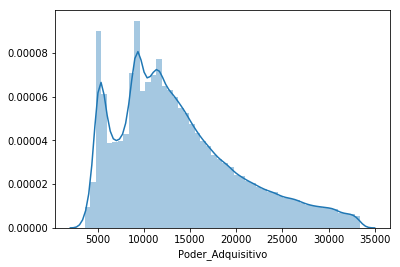

In [9]:
q1 = train_df["Poder_Adquisitivo"].quantile(0.25)
q3 = train_df["Poder_Adquisitivo"].quantile(0.75)
iqr = q3 - q1
fence_low  = q1 - 1.5 * iqr
fence_high = q3 + 1.5 * iqr

train_df_no_outliers = train_df.loc[(train_df["Poder_Adquisitivo"] > fence_low) & (train_df["Poder_Adquisitivo"] < fence_high)]
sns.distplot(train_df_no_outliers["Poder_Adquisitivo"])



In [10]:
print("Skewness: %f" % train_df_no_outliers["Poder_Adquisitivo"].skew())
print("Kurtosis: %f" % train_df_no_outliers["Poder_Adquisitivo"].kurt())

Skewness: 0.823076
Kurtosis: 0.098508


Si bien puede que sea necesario estudiar más si esta es la manera más óptima de tratar los valores extremos, ahora presenta unos valores de skewness y kurtosis mucho más aceptables.

### Análisis de las variables independientes.

De las variables "independientes", sabemos que contamos con algunas que son de tipo categórico en vez de númerico. Empezemos explorando estas variables y preparandolas para su posterior uso.



In [11]:
train_df["Socio_Demo_01"].value_counts()

09991     103393
09992      27266
09994      21070
0X301      15867
09993      15664
09511      13291
05220       8631
06110       8172
09512       7183
06120       5219
07121       4637
04500       4380
05120       3621
08432       2922
06300       2626
09210       2617
9992.0      2597
9991.0      2502
04111       2496
04309       2423
09602       2356
02230       1979
09700       1961
02240       1820
03613       1733
05000       1669
03611       1550
9512.0      1485
9994.0      1427
02121       1365
           ...  
3323           1
2156           1
2630           1
2157           1
2158.0         1
9223.0         1
2311           1
2324.0         1
2325           1
2415.0         1
2434.0         1
2437.0         1
2462.0         1
2463.0         1
2473.0         1
2640.0         1
3317           1
2653           1
8141           1
2933.0         1
2936.0         1
8132           1
3121           1
3124           1
3127           1
3134           1
3143.0         1
3152          

In [12]:
train_df["Socio_Demo_02"].value_counts()

1    222254
2    141580
Name: Socio_Demo_02, dtype: int64

Resulta inmediato convertir la segunda variable en un formato one-hot listo para ser usado por nuestros modelos. Más díficil es el caso de Socio_Dema_01 que cuenta que muchos valores que solo aparecen un número muy bajo de veces. Una primera aproximación puede ser usar por ejemplo los primeros 10 valores solo.

In [13]:
topk_socio_01 = train_df["Socio_Demo_01"].value_counts()[:10]
topk_socio_01

09991    103393
09992     27266
09994     21070
0X301     15867
09993     15664
09511     13291
05220      8631
06110      8172
09512      7183
06120      5219
Name: Socio_Demo_01, dtype: int64

Veamos si estas dos variables guardan alguna relación que se pueda ver a primera vista respecto al Poder adquisitivo.

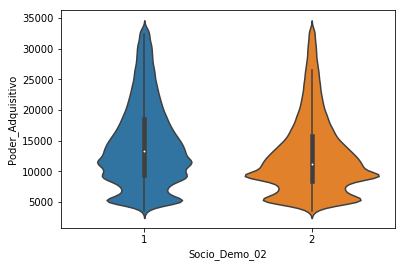

In [14]:
sns.violinplot(x=train_df_no_outliers["Socio_Demo_02"],y=train_df_no_outliers["Poder_Adquisitivo"])

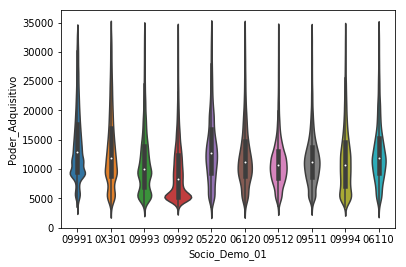

In [15]:
socio_01_keys = list(topk_socio_01.keys())
condition_array = [False] * len(train_df_no_outliers["Socio_Demo_01"])
for i in range(len(condition_array)):
    condition_array[i] = str(train_df_no_outliers["Socio_Demo_01"].iloc[i]) in socio_01_keys

sns.violinplot(x=train_df_no_outliers["Socio_Demo_01"].loc[condition_array],y=train_df_no_outliers["Poder_Adquisitivo"].loc[condition_array])

### Preparación de datos
Con todo lo visto anteriormente estamos listos para preparar los datos para la experimentación.



In [16]:
def process_df(df):
    df = df.drop(labels=["ID_Customer"],axis=1)
    
    #Convert to one-hot

    #Socio_Demo_02
    c1=df["Socio_Demo_02"] == 1
    c2=df["Socio_Demo_02"] == 2
    df.insert(loc=len(df.columns), column="Socio_Demo_02_01", value=c1.astype(int))
    df.insert(loc=len(df.columns), column="Socio_Demo_02_02", value=c2.astype(int))
    
    df = df.drop(axis=1, columns=["Socio_Demo_02"])

    # Socio_Demo_01
    for key in socio_01_keys:
        on = df["Socio_Demo_01"] == key
        df.insert(loc=len(df.columns), column="Socio_Demo_01_"+key, value=on.astype(int))
    
    # Add option other
    condition_array = [False] * len(df["Socio_Demo_01"])
    for i in range(len(condition_array)):
        condition_array[i] = str(df["Socio_Demo_01"].iloc[i]) not in socio_01_keys
    df.insert(loc=len(df.columns), column="Socio_Demo_01_Other", value=condition_array)
    df["Socio_Demo_01_Other"] = df["Socio_Demo_01_Other"].astype(int)
    
    df = df.drop(axis=1, columns=["Socio_Demo_01"])
    
    # Ind_prod for now is kept as it is right now
    
    
    
    return df

In [17]:
#Split train and eval data
EVAL_FRACTION = 0.05
SEED = 4

nr_eval_items = int(len(train_df)*EVAL_FRACTION)
shuffled_data = train_df.sample(frac=1,replace=False,random_state=SEED)

eval_data = shuffled_data[0:nr_eval_items]
train_data = shuffled_data[nr_eval_items:]



#Remove putliers
q1 = train_data["Poder_Adquisitivo"].quantile(0.25)
q3 = train_data["Poder_Adquisitivo"].quantile(0.75)
iqr = q3 - q1
fence_low  = q1 - 1.5 * iqr
fence_high = q3 + 1.5 * iqr

train_data_c = train_data.loc[(train_df["Poder_Adquisitivo"] > fence_low) & (train_df["Poder_Adquisitivo"] < fence_high)]




train_data_proc = process_df(train_data_c)
x_train = train_data_proc.drop(labels=["Poder_Adquisitivo"],axis=1).as_matrix()
y_train = train_data_proc["Poder_Adquisitivo"].as_matrix()


eval_data_proc = process_df(eval_data)
x_eval = eval_data_proc.drop(labels=["Poder_Adquisitivo"], axis=1).as_matrix()
y_eval = eval_data_proc["Poder_Adquisitivo"].as_matrix()



Preparamos la función de evaluación.

In [18]:
def evaluate(yhat,y):
    
    mse = mean_squared_error(y_true=y, y_pred=yhat)
    print("MSE: %f" % mse)
    
    rmse = math.sqrt(mse)
    print("RMSE: %f" % rmse)
  
    mae = mean_absolute_error(y_true=y,y_pred=yhat)
    print("MAE: %f" % mae)
    


In [19]:
model = LinearRegression()
model.fit(X=x_train,y=y_train)
yhat = model.predict(X=x_eval)
evaluate(yhat=yhat,y=y_eval)

MSE: 310386353.331168
RMSE: 17617.785143
MAE: 5075.562034


In [20]:
model = Lasso()
model.fit(X=x_train,y=y_train)
yhat = model.predict(X=x_eval)
evaluate(yhat=yhat,y=y_eval)

MSE: 310321194.931906
RMSE: 17615.935823
MAE: 5075.209654


In [21]:
"""
model = RandomForestRegressor(n_estimators=10,max_depth=3)
model.fit(X=x_train,y=y_train)
yhat = model.predict(X=x_eval)
evaluate(yhat=yhat,y=y_eval)
"""

'\nmodel = RandomForestRegressor(n_estimators=10,max_depth=3)\nmodel.fit(X=x_train,y=y_train)\nyhat = model.predict(X=x_eval)\nevaluate(yhat=yhat,y=y_eval)\n'

In [22]:
"""
model = RandomForestRegressor(n_estimators=10,max_depth=3,criterion="mae")
model.fit(X=x_train,y=y_train)
yhat = model.predict(X=x_eval)
evaluate(yhat=yhat,y=y_eval)
"""

'\nmodel = RandomForestRegressor(n_estimators=10,max_depth=3,criterion="mae")\nmodel.fit(X=x_train,y=y_train)\nyhat = model.predict(X=x_eval)\nevaluate(yhat=yhat,y=y_eval)\n'

Let us now scale the data.


In [23]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_eval_s = scaler.transform(x_eval)



In [24]:
model = LinearRegression()
model.fit(X=x_train_s,y=y_train)
yhat = model.predict(X=x_eval_s)
evaluate(yhat=yhat,y=y_eval)

MSE: 310379985.494084
RMSE: 17617.604420
MAE: 5075.574851


Probamos una transformación simple. Dividir el Poder_Adquisitivo por 1000.

In [25]:
y_train_d = y_train / 1000

In [26]:
model = LinearRegression()
model.fit(X=x_train,y=y_train_d)
yhat = model.predict(X=x_eval) * 1000
evaluate(yhat=yhat,y=y_eval)

MSE: 310386353.331157
RMSE: 17617.785143
MAE: 5075.562034


In [27]:
model = MLPRegressor(hidden_layer_sizes=(100),early_stopping=True) 
model.fit(X=x_train,y=y_train_d)
yhat = model.predict(X=x_eval) * 1000
evaluate(yhat=yhat, y=y_eval)

MSE: 76930770100.732712
RMSE: 277363.966839
MAE: 59392.495005


In [28]:
model = MLPRegressor(hidden_layer_sizes=(25,25),early_stopping=True)
model.fit(X=x_train,y=y_train_d)
yhat = model.predict(X=x_eval) * 1000
evaluate(yhat=yhat, y=y_eval)

MSE: 393438853.962684
RMSE: 19835.293140
MAE: 6066.980041


In [29]:
model = MLPRegressor(hidden_layer_sizes=(25,25,25),early_stopping=True)
model.fit(X=x_train,y=y_train_d)
yhat = model.predict(X=x_eval) * 1000
evaluate(yhat=yhat, y=y_eval)

MSE: 313051648.492337
RMSE: 17693.265625
MAE: 4890.306697
